In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split
import matplotlib as pl
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,Female,Single,6,148,72,35,0,Yes,33.6,0.627,50,1,No
1,Male,Divorced,1,85,66,29,0,Yes,26.6,0.351,31,0,Yes
2,Male,Divorced,8,183,64,0,0,No,23.3,0.672,32,1,No
3,Female,Married,1,89,66,23,94,Yes,28.1,0.167,21,0,Yes
4,Female,Married,0,137,40,35,168,No,43.1,2.288,33,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Female,Divorced,10,101,76,48,180,Yes,32.9,0.171,63,0,No
764,Female,Divorced,2,122,70,27,0,Yes,36.8,0.340,27,0,Yes
765,Female,Married,5,121,72,23,112,Yes,26.2,0.245,30,0,Yes
766,Female,Married,1,126,60,0,0,No,30.1,0.349,47,1,Yes


In [3]:
df.shape

(768, 13)

In [4]:
df.head(5)

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,Female,Single,6,148,72,35,0,Yes,33.6,0.627,50,1,No
1,Male,Divorced,1,85,66,29,0,Yes,26.6,0.351,31,0,Yes
2,Male,Divorced,8,183,64,0,0,No,23.3,0.672,32,1,No
3,Female,Married,1,89,66,23,94,Yes,28.1,0.167,21,0,Yes
4,Female,Married,0,137,40,35,168,No,43.1,2.288,33,1,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    768 non-null    object 
 1   Marital Status            768 non-null    object 
 2   Pregnancies               768 non-null    int64  
 3   Glucose                   768 non-null    int64  
 4   BloodPressure             768 non-null    int64  
 5   SkinThickness             768 non-null    int64  
 6   Insulin                   768 non-null    int64  
 7   Anxiety Diagnosis         768 non-null    object 
 8   BMI                       768 non-null    float64
 9   DiabetesPedigreeFunction  768 non-null    float64
 10  Age                       768 non-null    int64  
 11  Outcome                   768 non-null    int64  
 12  Family History            768 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 78.1+ KB


In [6]:
df.isnull().sum()

Gender                      0
Marital Status              0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
Anxiety Diagnosis           0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Family History              0
dtype: int64

In [7]:
#Exploratory Data Analysis (EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
print(df['Outcome'].unique())

[1 0]


<Axes: >

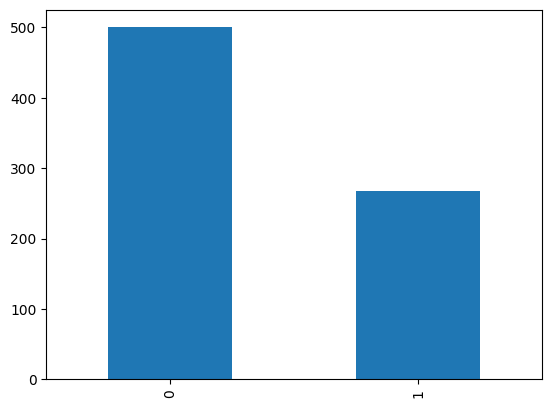

In [10]:
df['Outcome'].value_counts().plot(kind='bar')

<Axes: ylabel='Outcome'>

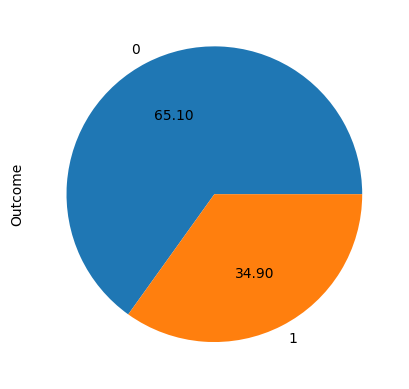

In [11]:
df['Outcome'].value_counts().plot(kind='pie',autopct='%.2f')

(array([457., 178.,  86.,  42.,   5.]),
 array([21., 33., 45., 57., 69., 81.]),
 <BarContainer object of 5 artists>)

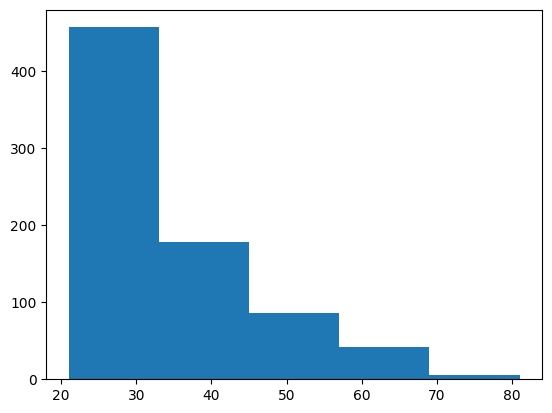

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=5)

<Axes: xlabel='Age', ylabel='Density'>

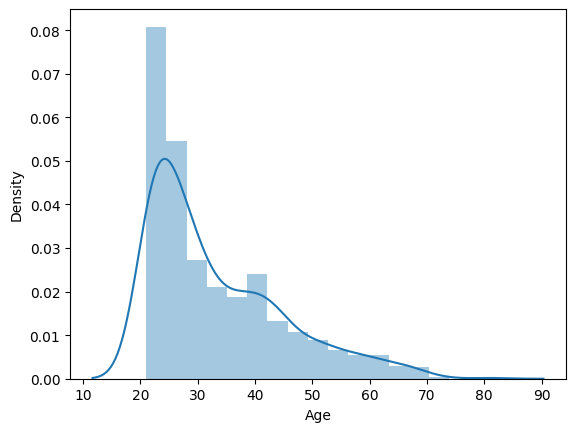

In [13]:
sns.distplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

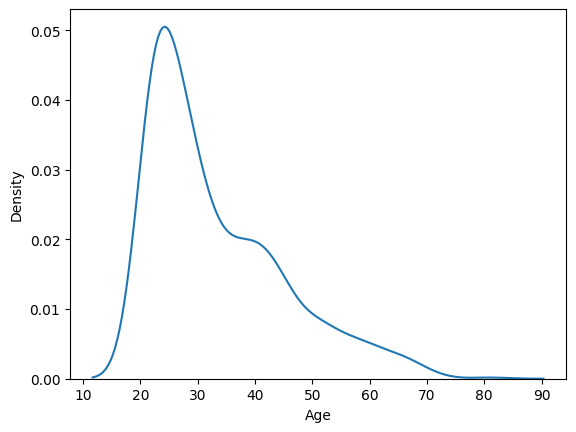

In [14]:
sns.distplot(df['Age'],hist=False)

In [15]:
#SKEWNESS
df['Age'].skew()

1.1295967011444805

In [16]:
#KURTOSIS
df['Age'].kurt()

0.6431588885398942

<Axes: >

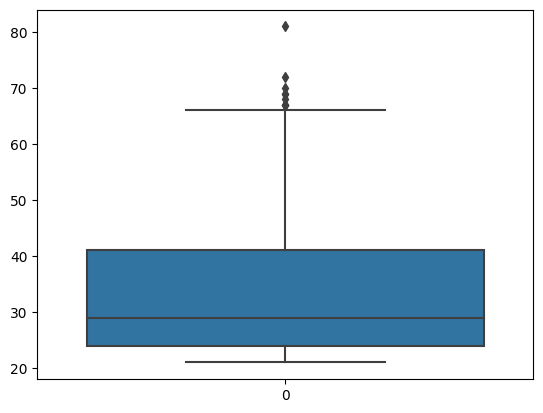

In [17]:
sns.boxplot(df['Age'])

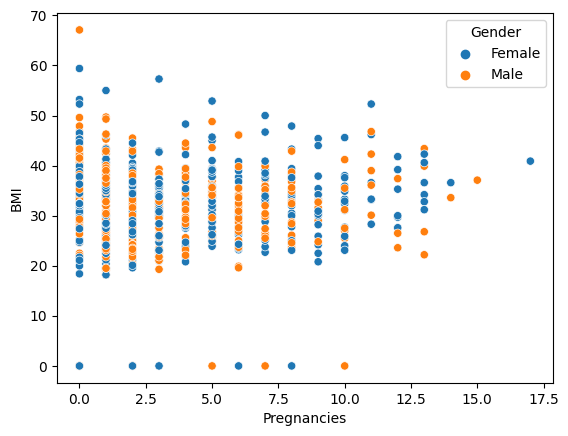

In [18]:
sns.scatterplot(data=df, x='Pregnancies', y='BMI', hue='Gender')
plt.show()

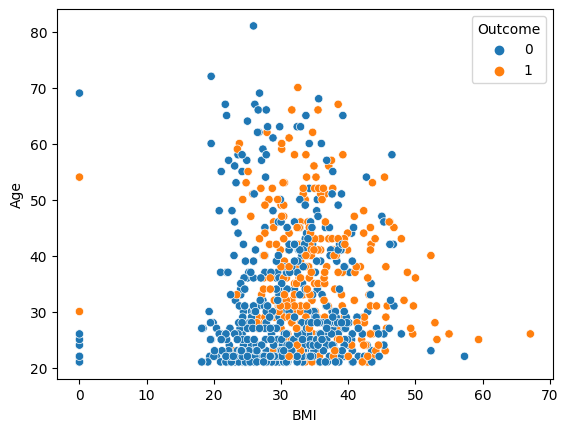

In [19]:
sns.scatterplot(data=df, x='BMI', y='Age', hue='Outcome')
plt.show()

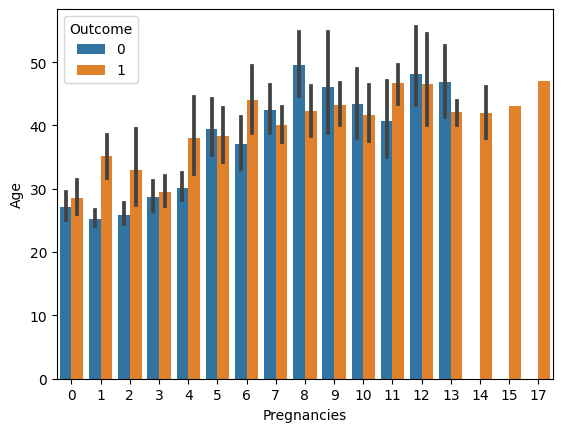

In [20]:
sns.barplot(data=df, x='Pregnancies', y='Age', hue='Outcome')
plt.show()

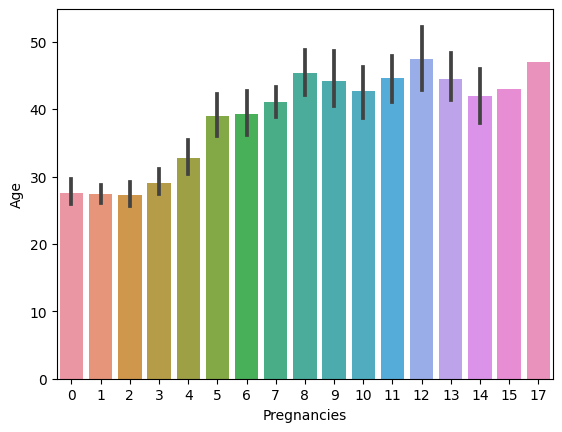

In [21]:
sns.barplot(data=df, x='Pregnancies', y='Age')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

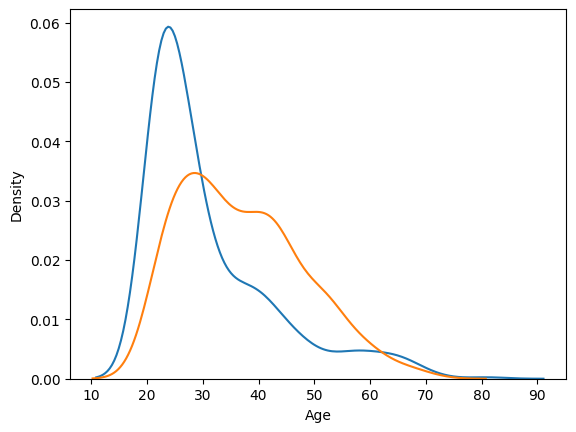

In [22]:
sns.distplot(df[df['Outcome']==0]['Age'],hist=False)
sns.distplot(df[df['Outcome']==1]['Age'],hist=False)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

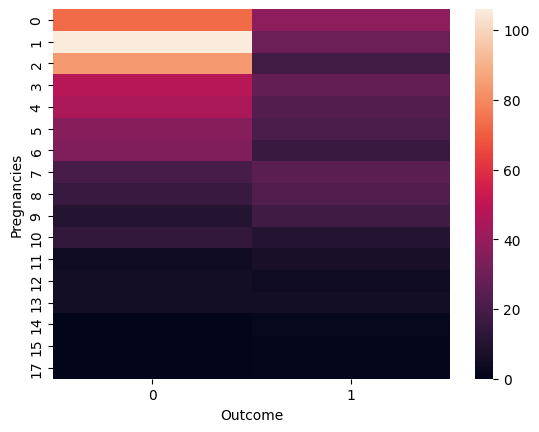

In [23]:
sns.heatmap(pd.crosstab(df['Pregnancies'],df['Outcome']))

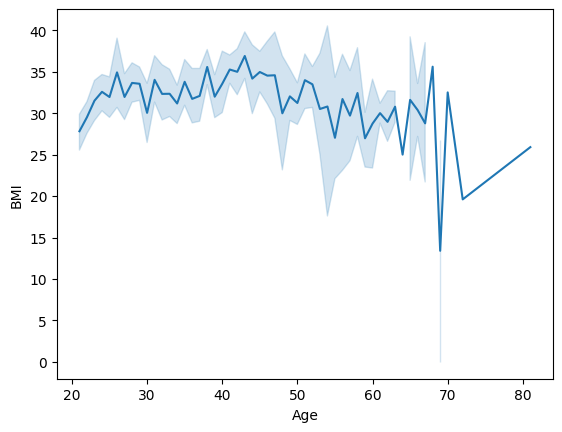

In [24]:
sns.lineplot(data=df, x='Age', y='BMI')
plt.show()

In [25]:
#Iris flower classification is a very popular machine learning project.
#The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’.
#The aim of the iris flower classification is to predict flowers based on their specific features.

In [26]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


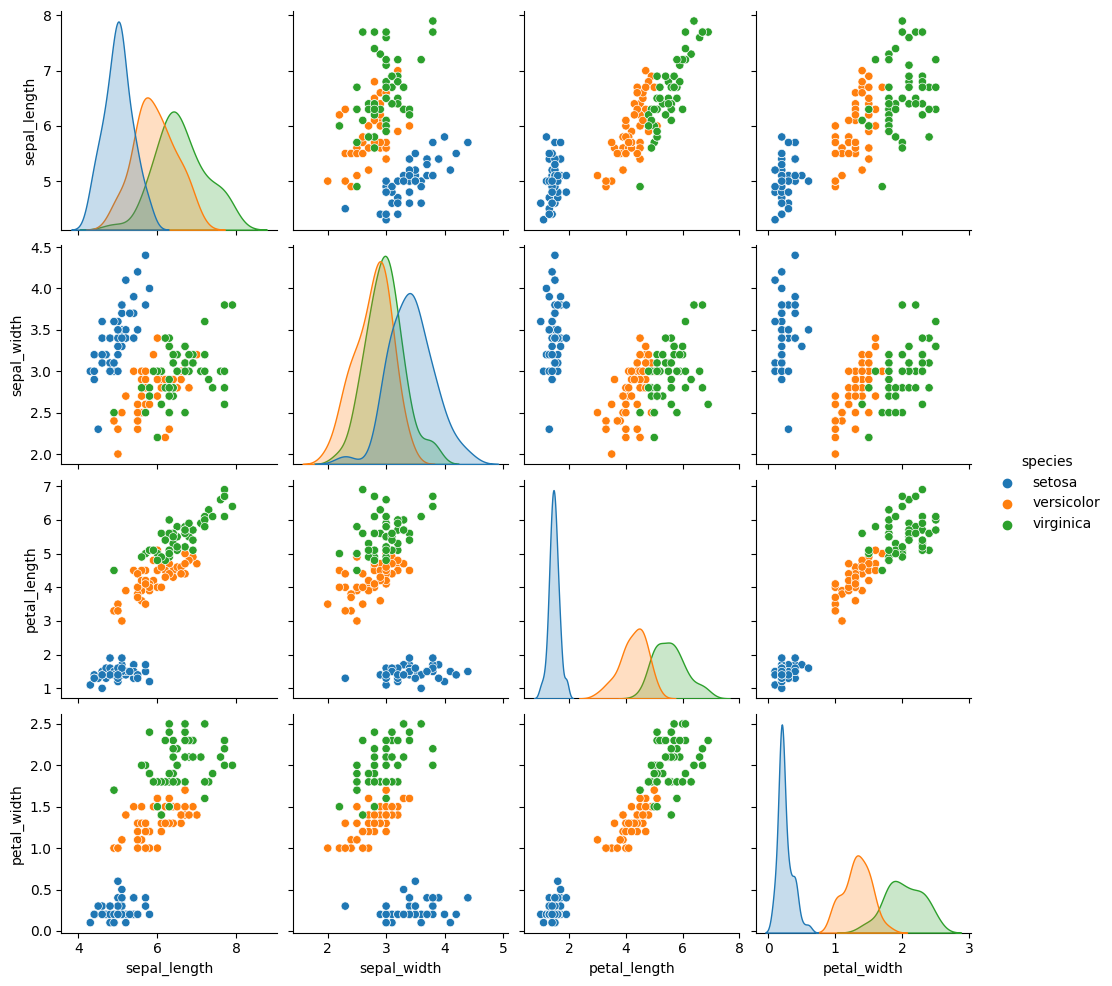

In [28]:
sns.pairplot(iris,hue='species')

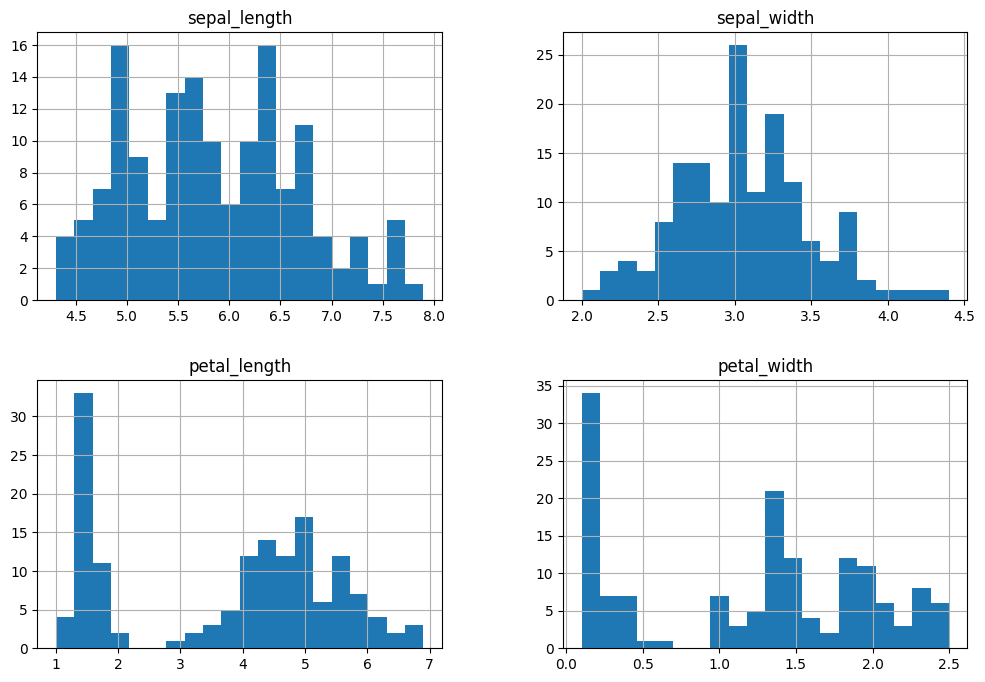

In [29]:
iris.hist(figsize=(12,8),bins=20)
plt.show()

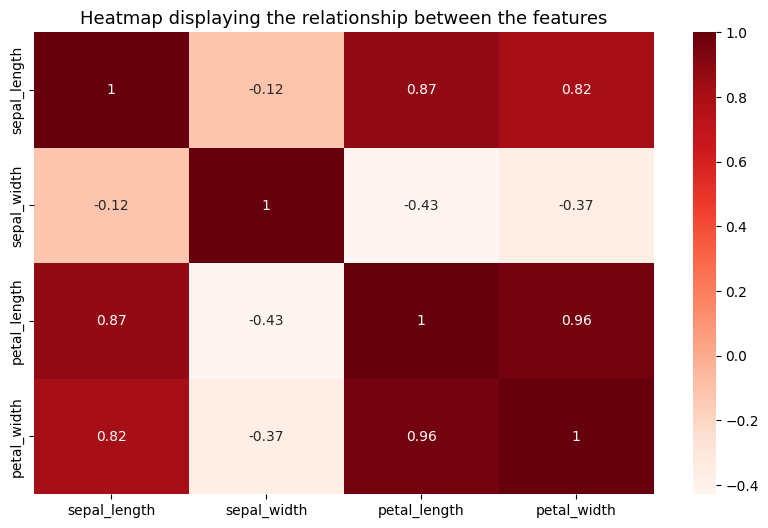

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(iris.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features',fontsize=13)
plt.show()

In [31]:
df.head(5)

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,Female,Single,6,148,72,35,0,Yes,33.6,0.627,50,1,No
1,Male,Divorced,1,85,66,29,0,Yes,26.6,0.351,31,0,Yes
2,Male,Divorced,8,183,64,0,0,No,23.3,0.672,32,1,No
3,Female,Married,1,89,66,23,94,Yes,28.1,0.167,21,0,Yes
4,Female,Married,0,137,40,35,168,No,43.1,2.288,33,1,Yes


In [32]:
#Ordinal Encoding

In [33]:
df[['Gender', 'Marital Status']]

,Gender,Marital Status
0,Female,Single
1,Male,Divorced
2,Male,Divorced
3,Female,Married
4,Female,Married
...,...,...
763,Female,Divorced
764,Female,Divorced
765,Female,Married
766,Female,Married


In [34]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [35]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [36]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Female', 'Male'],['Single', 'Divorced', 'Married']])
df[['Gender', 'Marital Status']]= oe.fit_transform(df[['Gender', 'Marital Status']])

In [37]:
oe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Single', 'Divorced', 'Married'], dtype=object)]

In [38]:
df[['Gender', 'Marital Status']]

,Gender,Marital Status
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,2.0
4,0.0,2.0
...,...,...
763,0.0,1.0
764,0.0,1.0
765,0.0,2.0
766,0.0,2.0


In [39]:
df.head(5)

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,0.0,0.0,6,148,72,35,0,Yes,33.6,0.627,50,1,No
1,1.0,1.0,1,85,66,29,0,Yes,26.6,0.351,31,0,Yes
2,1.0,1.0,8,183,64,0,0,No,23.3,0.672,32,1,No
3,0.0,2.0,1,89,66,23,94,Yes,28.1,0.167,21,0,Yes
4,0.0,2.0,0,137,40,35,168,No,43.1,2.288,33,1,Yes


In [40]:
#label encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Anxiety Diagnosis']= le.fit_transform(df['Anxiety Diagnosis'])

In [41]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
df.head(5)

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1,No
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0,Yes
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1,No
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0,Yes
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1,Yes


In [ ]:
#Outlier in Normal Distribution

In [ ]:
print("Mean value of Glucose",df['Glucose'].mean())
print("Std value of Glucose",df['Glucose'].std())
print("Min value of Glucose",df['Glucose'].min())
print("Max value of Glucose",df['Glucose'].max())

Mean value of Glucose 120.89453125
Std value of Glucose 31.97261819513622
Min value of Glucose 0
Max value of Glucose 199


In [ ]:
# upper limit= mean + 3*std
# lower limit= mean - 3*std

In [ ]:
# Finding the boundary values
upper_limit= df['Glucose'].mean() + 3*df['Glucose'].std()
lower_limit= df['Glucose'].mean() - 3*df['Glucose'].std()

In [ ]:
# Finding outlier
outlier = df[(df['Glucose'] > upper_limit) | (df['Glucose'] < lower_limit)]
outlier

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
75,0.0,1.0,1,0,48,20,0,0,24.7,0.140,22,0,Yes
182,1.0,1.0,1,0,74,20,23,1,27.7,0.299,21,0,Yes
342,1.0,1.0,1,0,68,35,0,1,32.0,0.389,22,0,Yes
349,0.0,0.0,5,0,80,32,0,1,41.0,0.346,37,1,No
502,0.0,1.0,6,0,68,41,0,0,39.0,0.727,41,1,No


In [ ]:
# Removing outlier
new_df = df[(df['Glucose'] < upper_limit) & (df['Glucose'] > lower_limit)]
new_df.shape

(763, 13)

In [ ]:
#Handling outliers using the Zscore
# z = (x- mean)/std

In [ ]:
# Finding the z score
df['Glucose_zscore'] = (df['Glucose'] - df['Glucose'].mean())/df['Glucose'].std()

In [ ]:
# Finding outlier
outlier = df[(df['Glucose_zscore'] > 3) | (df['Glucose_zscore'] < -3)]
outlier

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History,Glucose_zscore
75,0.0,1.0,1,0,48,20,0,0,24.7,0.140,22,0,Yes,-3.78119
182,1.0,1.0,1,0,74,20,23,1,27.7,0.299,21,0,Yes,-3.78119
342,1.0,1.0,1,0,68,35,0,1,32.0,0.389,22,0,Yes,-3.78119
349,0.0,0.0,5,0,80,32,0,1,41.0,0.346,37,1,No,-3.78119
502,0.0,1.0,6,0,68,41,0,0,39.0,0.727,41,1,No,-3.78119


In [ ]:
new_df1 = df[(df['Glucose_zscore'] < 3 ) & (df['Glucose_zscore'] > -3)]
new_df1.shape

(763, 14)

<Axes: >

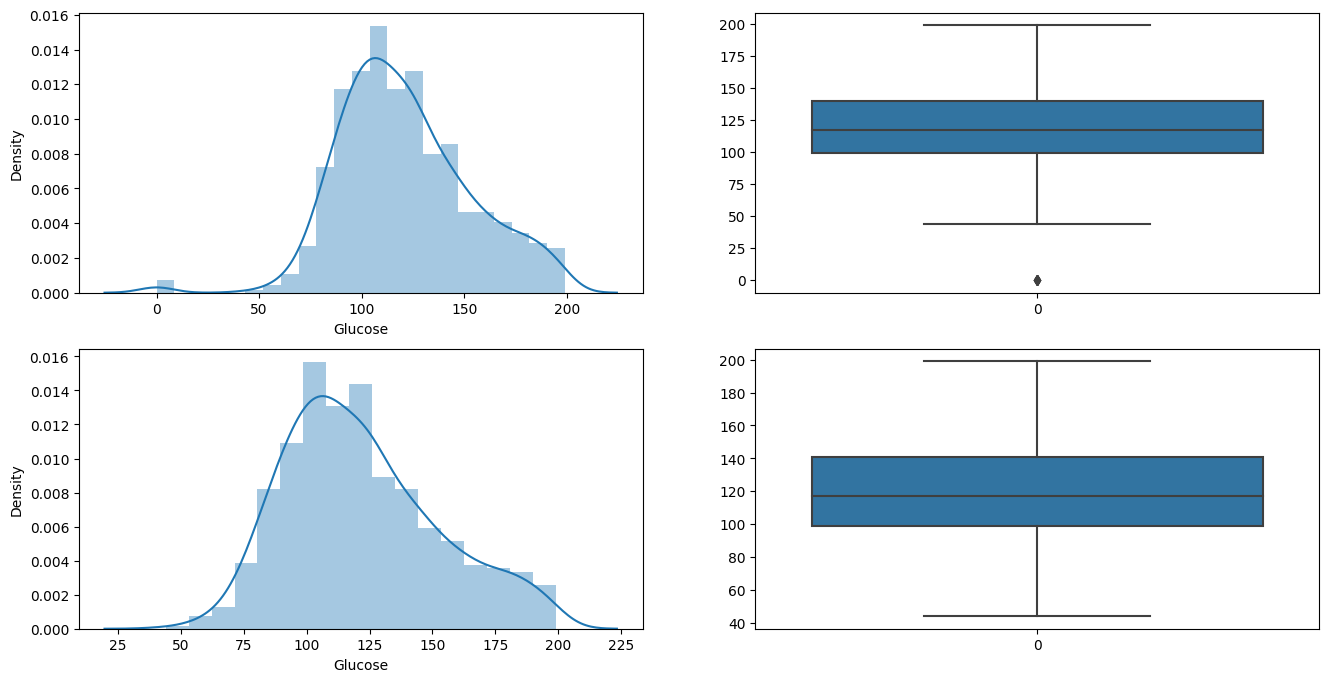

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Glucose'])

plt.subplot(2,2,2)
sns.boxplot(df['Glucose'])

plt.subplot(2,2,3)
sns.distplot(new_df1['Glucose'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['Glucose'])

In [ ]:
df.head(5)

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History,Glucose_zscore
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1,No,0.847771
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0,Yes,-1.122665
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1,No,1.942458
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0,Yes,-0.997558
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1,Yes,0.503727


In [ ]:
df=df.iloc[:,:-1]
df

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1,No
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0,Yes
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1,No
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0,Yes
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,1.0,10,101,76,48,180,1,32.9,0.171,63,0,No
764,0.0,1.0,2,122,70,27,0,1,36.8,0.340,27,0,Yes
765,0.0,2.0,5,121,72,23,112,1,26.2,0.245,30,0,Yes
766,0.0,2.0,1,126,60,0,0,0,30.1,0.349,47,1,Yes


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_scaled

array([[-0.99480516, -1.2033375 ,  0.63994726, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [ 1.00522197,  0.00156889, -0.84488505, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.00522197,  0.00156889,  1.23388019, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [-0.99480516,  1.20647528,  0.3429808 , ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.99480516,  1.20647528, -0.84488505, ..., -0.37110101,
         1.17073215,  1.36589591],
       [ 1.00522197, -1.2033375 , -0.84488505, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
X_pca

,PC1,PC2
0,-1.691162,1.328559
1,1.542627,-0.616839
2,-0.646095,1.831325
3,1.530763,-1.105387
4,-2.583512,-2.375161
...,...,...
763,-1.271691,1.307562
764,0.503319,-0.588975
765,0.523071,-0.008899
766,0.085725,1.242872


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.5584415584415584


In [ ]:
df

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1,No
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0,Yes
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1,No
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0,Yes
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,1.0,10,101,76,48,180,1,32.9,0.171,63,0,No
764,0.0,1.0,2,122,70,27,0,1,36.8,0.340,27,0,Yes
765,0.0,2.0,5,121,72,23,112,1,26.2,0.245,30,0,Yes
766,0.0,2.0,1,126,60,0,0,0,30.1,0.349,47,1,Yes


In [ ]:
# Print the column names in df
print(df.columns)

# Ensure 'Family History' column is present and note the exact column name


Index(['Gender', 'Marital Status', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'Anxiety Diagnosis', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Family History '],
      dtype='object')


In [ ]:
finalDf = pd.concat([X_pca, df[['Family History ']]], axis = 1)

In [ ]:
X = finalDf.iloc[:,:-1]
y = finalDf.iloc[:,-1]


In [ ]:
X_train.shape

(691, 2)

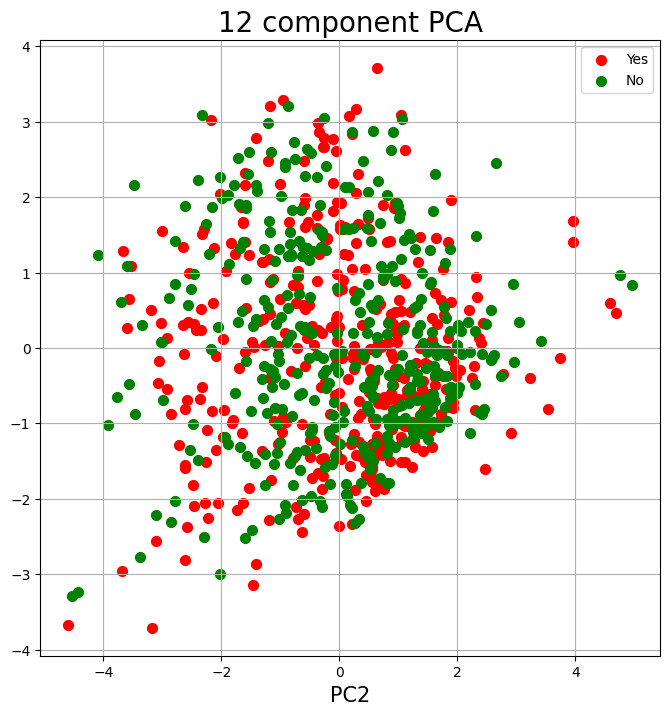

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_xlabel('PC2', fontsize = 15)

ax.set_title('12 component PCA', fontsize = 20)

targets = ['Yes', 'No']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Family History '] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
df.head(5)

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1,No
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0,Yes
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1,No
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0,Yes
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1,Yes


In [ ]:
df

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome,Family History
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1,No
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0,Yes
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1,No
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0,Yes
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,1.0,10,101,76,48,180,1,32.9,0.171,63,0,No
764,0.0,1.0,2,122,70,27,0,1,36.8,0.340,27,0,Yes
765,0.0,2.0,5,121,72,23,112,1,26.2,0.245,30,0,Yes
766,0.0,2.0,1,126,60,0,0,0,30.1,0.349,47,1,Yes


In [ ]:
df=df.iloc[:,:-1]
df

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,1.0,10,101,76,48,180,1,32.9,0.171,63,0
764,0.0,1.0,2,122,70,27,0,1,36.8,0.340,27,0
765,0.0,2.0,5,121,72,23,112,1,26.2,0.245,30,0
766,0.0,2.0,1,126,60,0,0,0,30.1,0.349,47,1


In [ ]:
#Scalling

In [ ]:
X= df.drop('Outcome', axis=1)
y= df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((537, 11), (231, 11))

In [ ]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
scaler.mean_

array([  0.50837989,   0.97206704,   3.75791434, 121.0018622 ,
        68.95158287,  19.54189944,  77.5009311 ,   0.49534451,
        31.83891993,   0.46815642,  33.31284916])

In [ ]:
X_train

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age
88,1.0,1.0,15,136,70,32,110,1,37.1,0.153,43
467,1.0,0.0,0,97,64,36,100,1,36.8,0.600,25
550,1.0,2.0,1,116,70,28,0,0,27.4,0.204,21
147,1.0,1.0,2,106,64,35,119,0,30.5,1.400,34
481,1.0,2.0,0,123,88,37,0,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...,...,...,...
645,0.0,1.0,2,157,74,35,440,1,39.4,0.134,30
715,0.0,2.0,7,187,50,33,392,0,33.9,0.826,34
72,1.0,1.0,13,126,90,0,0,1,43.4,0.583,42
235,1.0,0.0,4,171,72,0,0,1,43.6,0.479,26


In [ ]:
X_train_scaled

array([[ 0.98337834,  0.03390058,  3.3536084 , ...,  0.68611992,
        -0.94690147,  0.81020454],
       [ 0.98337834, -1.1797401 , -1.12101735, ...,  0.64699564,
         0.39612987, -0.69526203],
       [ 0.98337834,  1.24754125, -0.82270897, ..., -0.5788985 ,
        -0.7936697 , -1.02981015],
       ...,
       [ 0.98337834,  0.03390058,  2.75699163, ...,  1.50772982,
         0.34505262,  0.72656751],
       [ 0.98337834, -1.1797401 ,  0.07221618, ...,  1.53381267,
         0.03258   , -0.611625  ],
       [ 0.98337834,  0.03390058,  1.5637581 , ...,  0.13837998,
         0.59142526,  1.06111563]])

In [ ]:
np.round(X_train_scaled, 1)

array([[ 1. ,  0. ,  3.4, ...,  0.7, -0.9,  0.8],
       [ 1. , -1.2, -1.1, ...,  0.6,  0.4, -0.7],
       [ 1. ,  1.2, -0.8, ..., -0.6, -0.8, -1. ],
       ...,
       [ 1. ,  0. ,  2.8, ...,  1.5,  0.3,  0.7],
       [ 1. , -1.2,  0.1, ...,  1.5,  0. , -0.6],
       [ 1. ,  0. ,  1.6, ...,  0.1,  0.6,  1.1]])

In [ ]:
X_train_scaled.dtype

dtype('float64')

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

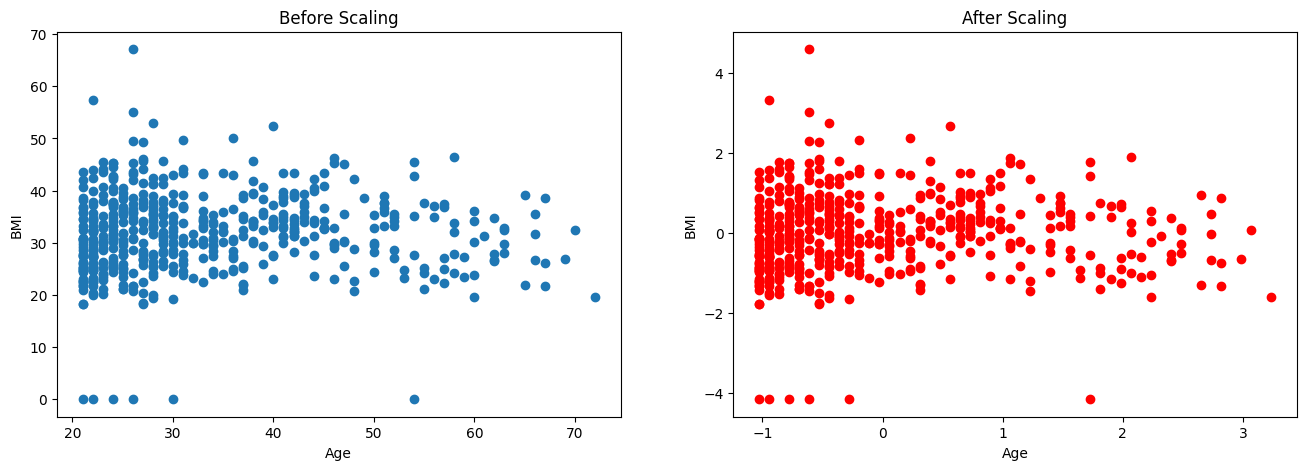

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['Age'], X_train['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['BMI'],color='red')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('After Scaling')


plt.show()

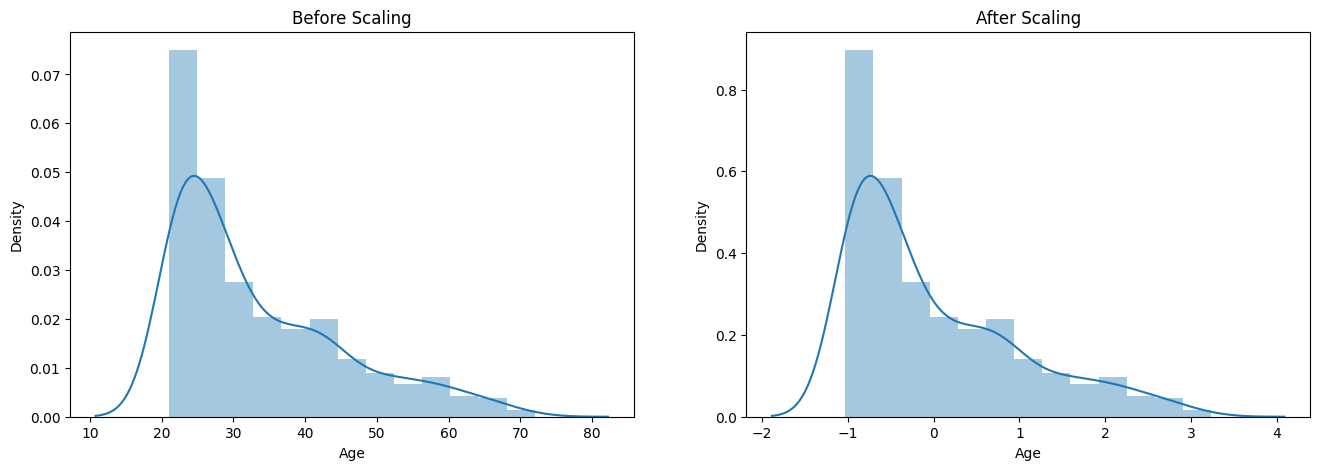

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['Age'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled['Age'])
plt.title('After Scaling')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training features and target respectively
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model (for regression tasks, using metrics like Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data:", mse)


Mean Squared Error on test data: 0.1531738579539496


In [ ]:
#Min Max Normalization
# x' = (x - min)/(max - min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled1 = scaler.transform(X_train)
X_test_scaled1 = scaler.transform(X_test)


In [ ]:
X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns=X_train.columns)
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns=X_test.columns)

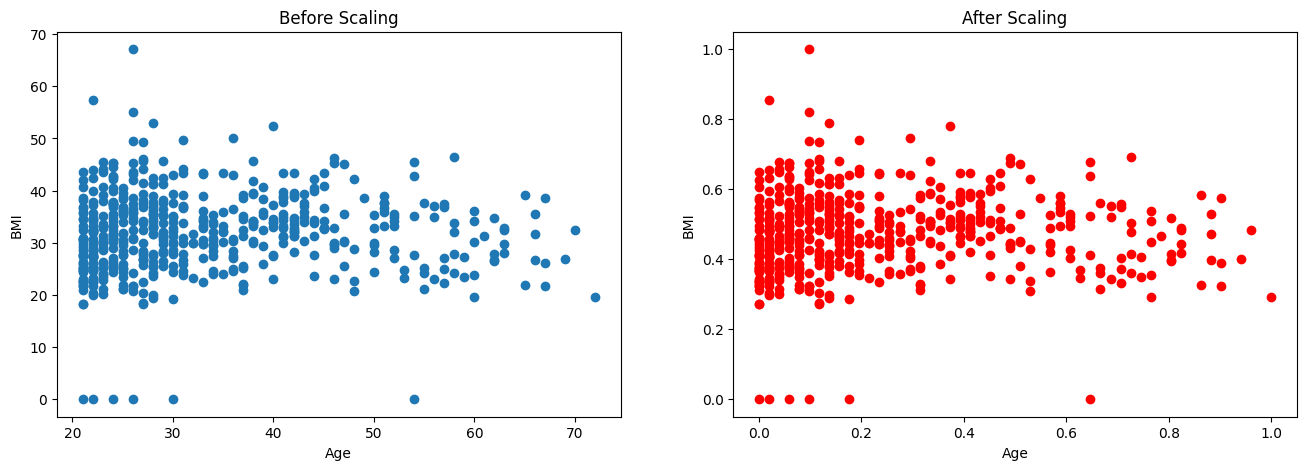

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['Age'], X_train['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled1['Age'], X_train_scaled1['BMI'],color='red')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('After Scaling')


plt.show()

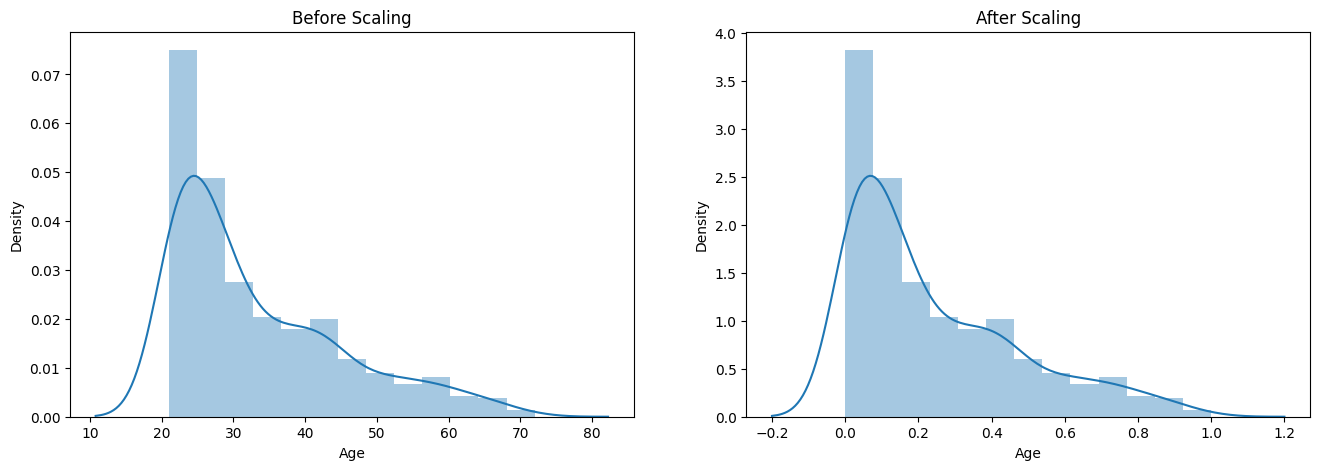

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['Age'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled1['Age'])
plt.title('After Scaling')

plt.show()

In [ ]:
df.head(5)

,Gender,Marital Status,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Anxiety Diagnosis,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,0.0,6,148,72,35,0,1,33.6,0.627,50,1
1,1.0,1.0,1,85,66,29,0,1,26.6,0.351,31,0
2,1.0,1.0,8,183,64,0,0,0,23.3,0.672,32,1
3,0.0,2.0,1,89,66,23,94,1,28.1,0.167,21,0
4,0.0,2.0,0,137,40,35,168,0,43.1,2.288,33,1


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Train data accuracy: 0.8081936685288641
Test data accuracy: 0.7705627705627706
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.59      0.65        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



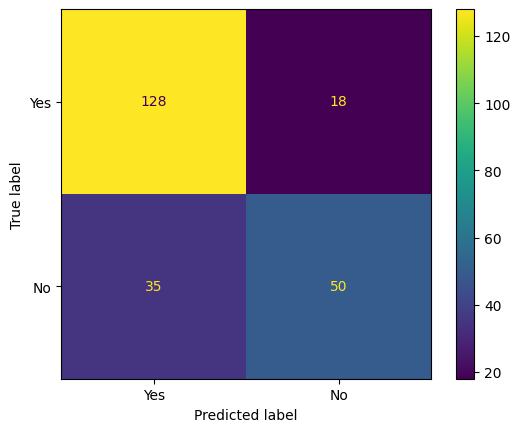

In [ ]:
#KNeighbors Classifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Train data accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("Test data accuracy:", accuracy_score(y_test, knn.predict(X_test)))

c1 = classification_report(y_test, knn.predict(X_test))
print(c1)

# Generate confusion matrix and display it
confusion_mat = confusion_matrix(y_test, knn.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['Yes', 'No'])
cm_display.plot()
plt.show()

Train data accuracy: 0.7355679702048417
Test data accuracy: 0.7359307359307359
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       146
           1       0.72      0.46      0.56        85

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



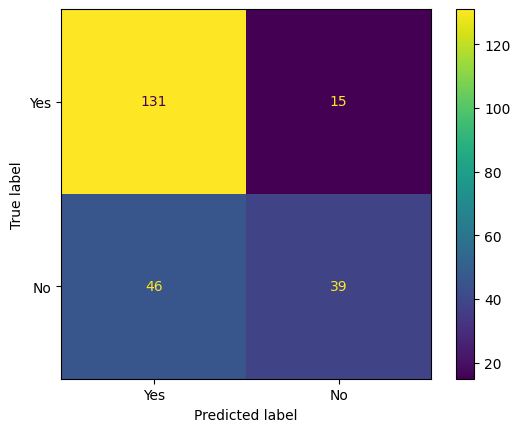

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


logr = LogisticRegression()
logr.fit(X_train, y_train)

print("Train data accuracy:", accuracy_score(y_train, logr.predict(X_train)))
print("Test data accuracy:", accuracy_score(y_test, logr.predict(X_test)))

c1 = classification_report(y_test, logr.predict(X_test))
print(c1)

# Generate confusion matrix and display it
confusion_mat = confusion_matrix(y_test, logr.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['Yes', 'No'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[132  14]
 [ 31  54]]


In [ ]:
rfc.score(X_test,y_test)

0.8051948051948052

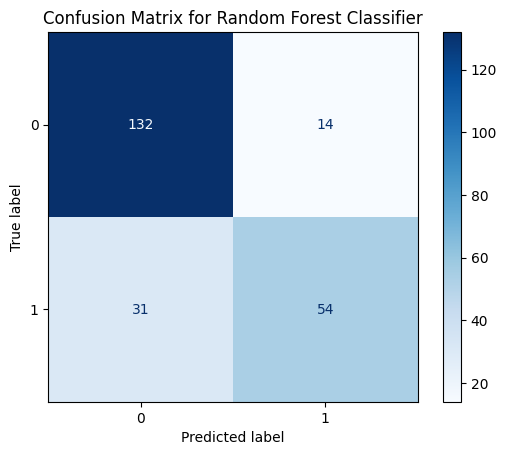

Test data accuracy: 0.8051948051948052


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfc.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Calculate and print the accuracy score
accuracy = rfc.score(X_test, y_test)
print("Test data accuracy:", accuracy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.57      0.51      0.53        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231



In [ ]:
dtc.score(X_test,y_test)

0.6753246753246753

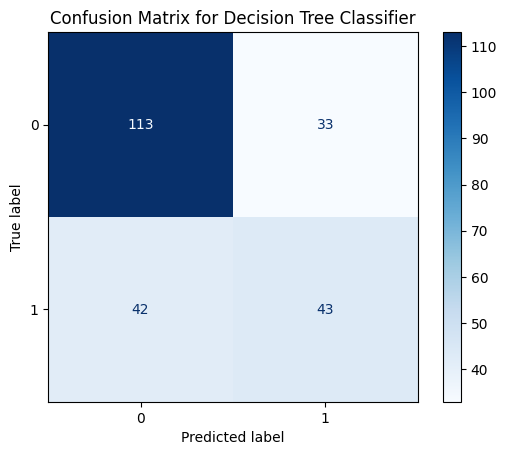

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.57      0.51      0.53        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231

Test data accuracy: 0.6753246753246753


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtc.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Print classification report
print(classification_report(y_test, predictions))

# Calculate and print the accuracy score
accuracy = dtc.score(X_test, y_test)
print("Test data accuracy:", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Iterate through each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.735931   0.722222  0.458824  0.561151
1  K-Nearest Neighbors  0.770563   0.735294  0.588235  0.653595
2        Random Forest  0.779221   0.750000  0.600000  0.666667
3        Decision Tree  0.692641   0.585366  0.564706  0.574850
